# Visualization of portfolio policies for natural disaster experiment

This notebook helps visualize allocations by different portfolio policies to different clusters in the natural disaster experiment. We choose the portfolio obtained by the line search algorithm for $\alpha = 0.95$ for this visualization.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from src.p_mean import generalized_p_mean, get_optimum_vector, generate_p_grid
from src.portfolio import Policy, Portfolio, budget_portfolio_with_suboptimalities, portfolio_with_line_search, compute_portfolio_worst_approx_ratio, portfolio_of_random_policies, portfolio_of_random_norms, portfolio_with_gpi, gpi
from tqdm import tqdm
import os
from matplotlib.patches import Rectangle

plt.rcParams['figure.dpi'] = 200

# Generate the portfolio

In [5]:
# Load scores

scores = pd.read_csv(os.path.join('..', '..', 'data', 'natural_disaster', 'policy_rewards.csv'))
scores = np.array(scores)
scores = [scores[i] for i in range(len(scores))]

# Initialize parameters
d = len(scores[0])
alpha=0.95

# Functions
def get_optimum_policy(p):
    return get_optimum_vector(vectors=scores, p=p)

def get_performance(policy, p):
    return generalized_p_mean(x=policy, p=p)

def get_optimal_value(p):
    return get_performance(Policy(get_optimum_policy(p)), p)

# Compute portfolio
line_search_portfolio = portfolio_with_line_search(
    get_optimum_policy=get_optimum_policy, get_performance=get_performance, alpha=alpha,
    d=d,
)


# Plot

In [14]:
# Map p: policy
line_search_portfolio = {
    line_search_portfolio.policies[i].p: line_search_portfolio.policies[i].id for i in range(len(line_search_portfolio))
}
line_search_portfolio

{-48.44505854923433: array([0.03      , 0.02966667, 0.02659351, 0.0375    , 0.02810519,
        0.09076667, 0.03042   , 0.2230859 , 0.11871667, 0.03841364,
        0.03772841, 0.31666667]),
 -11.361264637308583: array([0.03038182, 0.02719559, 0.02618123, 0.04532128, 0.0433595 ,
        0.17934573, 0.03509091, 0.26262534, 0.17313774, 0.04857438,
        0.03791529, 0.0375    ]),
 -1.6074542594322792: array([0.0349    , 0.02542287, 0.13476702, 0.03791529, 0.02194392,
        0.08064601, 0.03038182, 0.09527845, 0.22666667, 0.23395489,
        0.03791529, 0.04532128]),
 0.5768425246714898: array([0.15597667, 0.01666667, 0.03213636, 0.03772841, 0.02161753,
        0.06801667, 0.03763   , 0.10667168, 0.01517318, 0.0433625 ,
        0.23291667, 0.31666667])}

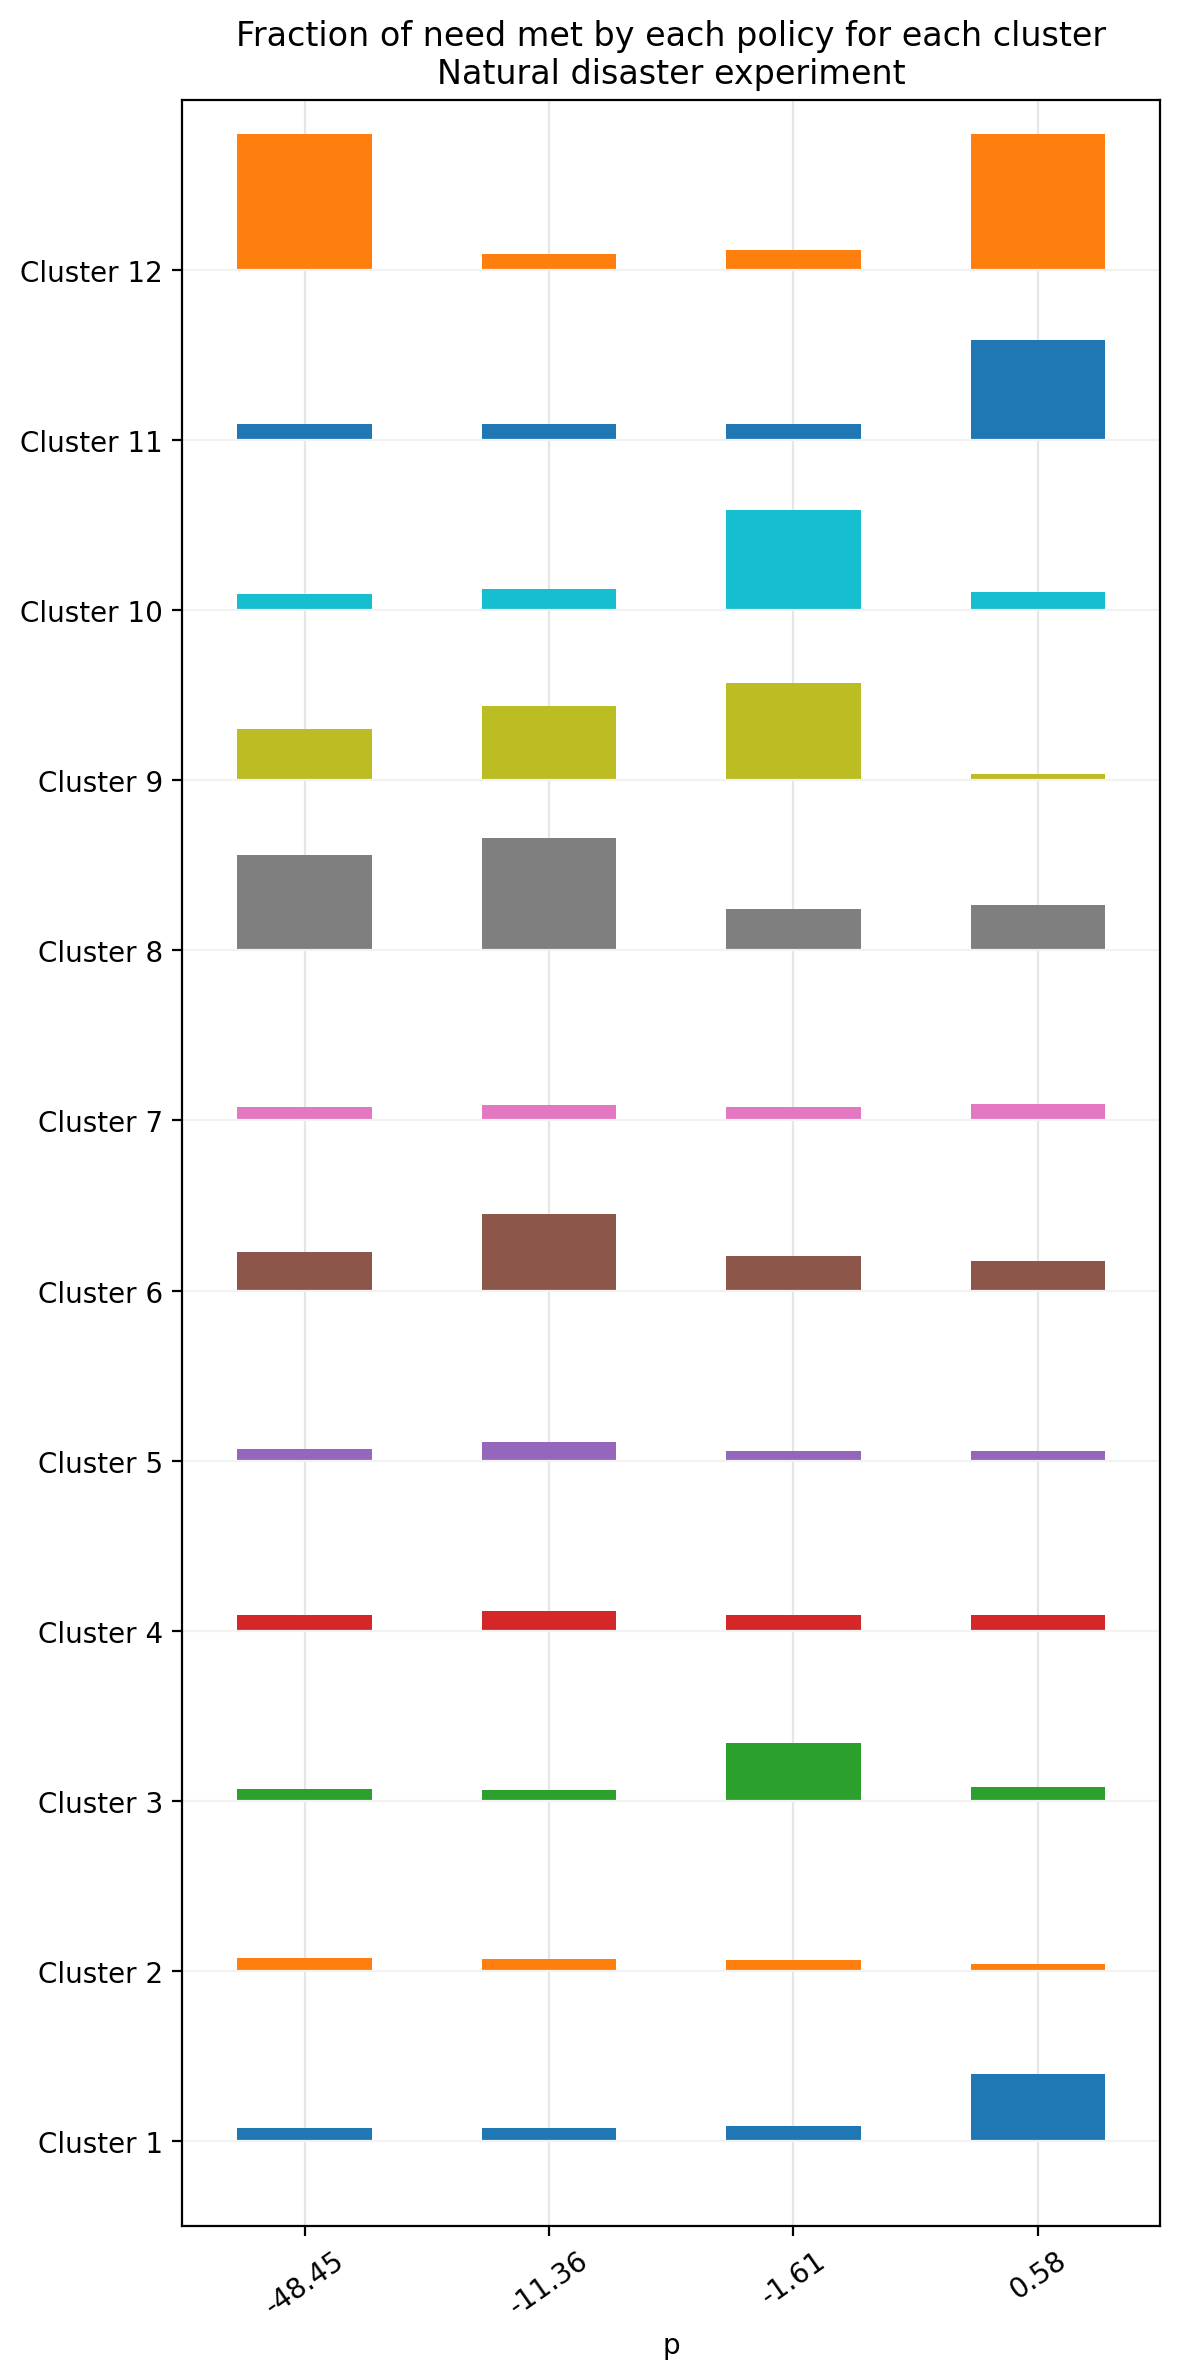

In [34]:
# Plot

# --- reshape for plotting ---
# Use evenly spaced x positions; keep original p values only as labels.
p_vals = list(line_search_portfolio.keys())
m = len(p_vals)                       # number of p's (columns)
n = len(next(iter(line_search_portfolio.values())))  # clusters (rows)

# values[i, j] = value for Cluster i at p index j
values = np.column_stack([line_search_portfolio[p] for p in p_vals])
vmax = values.max()

fig, ax = plt.subplots(figsize=(6, 12))

row_h = 1.0            # vertical space per cluster row
bar_w = 0.55           # width of each little bar (fixed)
y0 = 0.0
ax.set_xlim(-0.5, m - 0.5)
ax.set_ylim(y0, y0 + n + 0.5)

# color per cluster (consistent across columns)
cmap = plt.get_cmap('tab10')
cluster_colors = [cmap(i % 10) for i in range(n)]

# draw bars
for i in range(n):                 # cluster index (row)
    y_center = y0 + i + 0.5
    for j in range(m):             # p index (column)
        x_center = j
        h = (values[i, j] / vmax) * (row_h * 0.8)   # height proportional to value
        rect = Rectangle(
            (x_center - bar_w / 2, y_center),  # bottom-left
            bar_w, h,
            facecolor=cluster_colors[i],
            edgecolor='none'
        )
        ax.add_patch(rect)

ax.set_yticks([y0 + i + 0.5 for i in range(n)])
ax.set_yticklabels([f"Cluster {i+1}" for i in range(n)])
ax.set_xticks(range(m))
ax.set_xticklabels([f"{p:.2f}" for p in p_vals], rotation=35)

ax.set_xlabel("p")
ax.set_title("Fraction of need met by each policy for each cluster\nNatural disaster experiment")

# light vertical guides
for j in range(m):
    ax.axvline(j, color='0.9', lw=0.8, zorder=0)
ax.grid(axis='y', color='0.95')

plt.tight_layout()
plt.show()
